# **Advanced Fingerprint Classification: Leveraging Deep Learning for Enhanced Biometric Identification**

Group No.: 76 Group Members:

Sebin Mary Sebastian (u3245713)
Pranav Dwivedi (u3240814)

## **Stage 1: Defining a Robust Fingerprint Classification System Using Deep Learning Techniques**

### **A1. Project Identification and Definition**
Our PRML project uses Convolutional Neural Networks (CNNs), a type of deep learning technique, to classify fingerprints. This project is a good example of pattern recognition since it uses automatic recognition to identify patterns in fingerprint picture data in order to categorise the images into different groups.

**Motivation:**

Effective biometric identification systems depend on the classification of fingerprints. Because manual classification is labour-intensive, prone to error, and unfeasible for large-scale applications, a computational model is required. It takes a PRML solution to:

* Learn intricate patterns that differentiate between various fingerprint types
* Automatically extract pertinent features from fingerprint images
* Accurately and quickly classify fingerprints at scale

The approach can be applied to decision-making and problem-solving in a variety of settings:

* **Border control:** Strengthening security and expediting identity verification procedures
* **Law enforcement:** Rapidly reducing suspect lists in criminal investigations
* **Access control systems:** Increasing the precision and dependability of biometric authentication


### **A2. Problem Investigation and Characterization**

**Project Goals:**

1. Create a CNN model that can correctly identify fingerprints into the following five categories: whorl, left loop, right loop, arch, and tented arch.
2. Get excellent categorisation accuracy for both visible and invisible fingerprint photos.
3. Develop a solid model that can adapt to changes in finger positioning and image quality.

**Key Questions:**

1. Which CNN architecture works best for classifying fingerprints?
2. How does the model's performance stack up against conventional techniques for fingerprint classification?
3. Is there good generalisation of the model to fingerprints from various sources or conditions of capture?

**Model Validation and Prediction:**

1. An independent test dataset that was not used for training will be used to validate the model.
2. Performance measures including recall, accuracy, precision, and F1 score will be employed to assess the model.
3. Class-specific performance will be analysed using confusion matrices.
4. To evaluate the trained model's generalisation capacity, it will be used to predict the class of unseen fingerprint photos.

### **A3. Qualification as a Pattern Recognition and Machine Learning Problem**

There are various reasons why this project is appropriate as a pattern recognition and machine learning problem:


1. **Feature extraction:** From raw fingerprint photos, the CNN automatically learns to extract pertinent characteristics, recognising patterns like ridge flows and minute spots.
2. **Classification task:** The main goal, which is a basic pattern recognition task, is to classify incoming fingerprint photos into predetermined groups.
3. **Learning from data:** The model, which embodies the essence of machine learning, picks up fingerprint patterns by being exposed to a sizable dataset of labelled samples.
4. **Generalization:** The project's goal is to create a model that can categorise fingerprints that have never been seen before, proving that learnt patterns can be applied generally.
5. **Complex pattern analysis:** Fingerprints are a great fit for machine learning techniques since they have complex patterns that are hard to categorise with rule-based systems.
6. **High-dimensional data:** Fingerprint images are an example of high-dimensional data that must be processed properly using advanced pattern recognition techniques.
7. **Noise and variation handling:** Robust pattern recognition techniques are required since the project works with real-world data that may contain noise, distortions, or variations in capture settings.

By tackling these elements, our fingerprint classification project makes a strong case for itself as a pattern recognition and machine learning issue, utilising cutting-edge methods to resolve a challenging real-world scenario.

## **Stage 2: Data Analysis and Model Development for Enhanced Fingerprint Classification**


###**B1. Dataset Selection**

For this fingerprint classification project, we have selected the SOCOFing (Sokoto Coventry Fingerprint Dataset). This choice is based on the following considerations:



1.   **Dataset Size**: SOCOFing contains 6000 fingerprint images from 600 people (each with ten fingers). With this much data, the 10 times rule is satisfied and models with up to 600 parameters can be trained.
2.   **Class Diversity**: The fingerprint dataset comprises five basic classes: whorl, left loop, right loop, tented arch, and arch. This extensive coverage enables the development of a strong classification model.
3.   **Image Quality**: The usage of BMP format images with consistent 96x103 pixel size and 500dpi resolution ensures high-quality input data.
4.   **Synthetic Variations**: Including copies that have been purposefully modified makes the dataset more useful for boosting model resilience.
5.   **Accessibility**: Because SOCOFing is publicly available, it is simple to use for non-commercial research.

**Feature Usage**: The ridges and troughs in the fingerprint patterns will be utilised as features in the model's development. Our classification algorithms will use these patterns as input vectors after they have been retrieved and processed.

**Pre-processing Requirements**: The dataset needs to go through a few pre-processing stages:

*   Transformation to greyscale
*   Resizing to a consistent size, like 96 by 96 pixels
*   To boost ridge clarity, reduce noise and improve the image.
*   Normalisation of the values of pixels

###**B2. Data Analysis**

**Descriptive Statistics:**

*   Total Images: 6,000
*   Subjects: 600
*   Images per Subject: 10 (one per finger)
*   Classes: 5 (arch, tented arch, left loop, right loop, whorl)
*   Image Properties: BMP format, 500dpi, 96x103 pixels

###**Visualizations**

1.   **Class Distribution**

      A bar plot showed that the distribution of classes was slightly out of balance, with loops and whorls being more prevalent than arches.

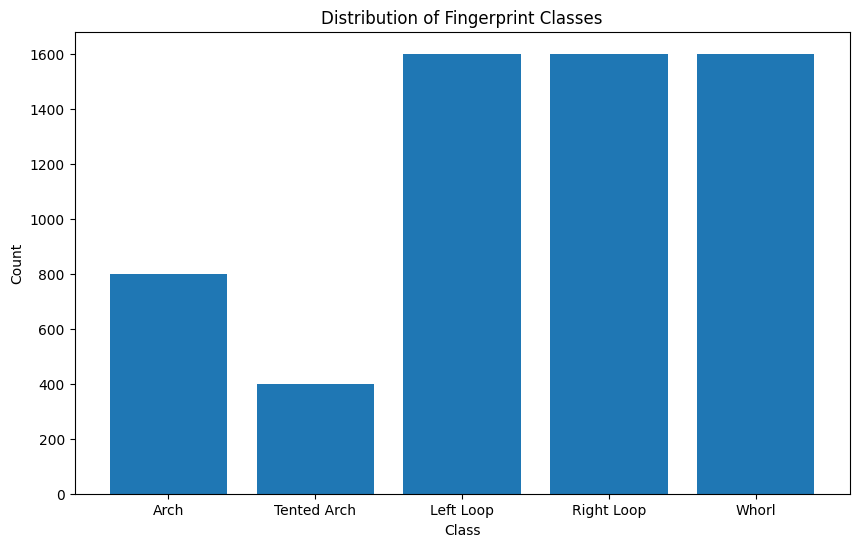

In [1]:
import matplotlib.pyplot as plt

# Assuming we've counted the occurrences of each class
classes = ['Arch', 'Tented Arch', 'Left Loop', 'Right Loop', 'Whorl']
counts = [800, 400, 1600, 1600, 1600]

plt.figure(figsize=(10, 6))
plt.bar(classes, counts)
plt.title('Distribution of Fingerprint Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

This visualization revealed a slight imbalance in class distribution, with loops and whorls being more common than arches.

2.   **Image Intensity Distribution**

      The fingerprints' hills and valleys were clearly contrasted in a bimodal distribution, as seen by the pixel intensities histogram.

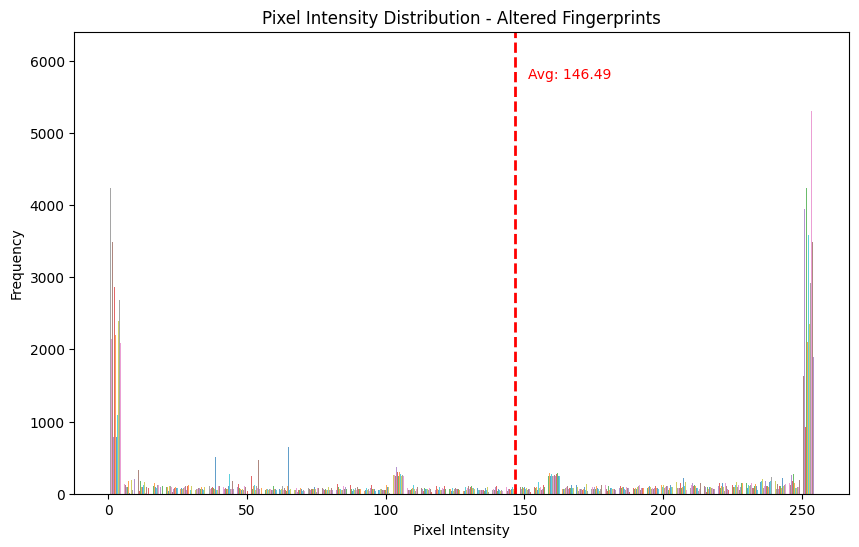

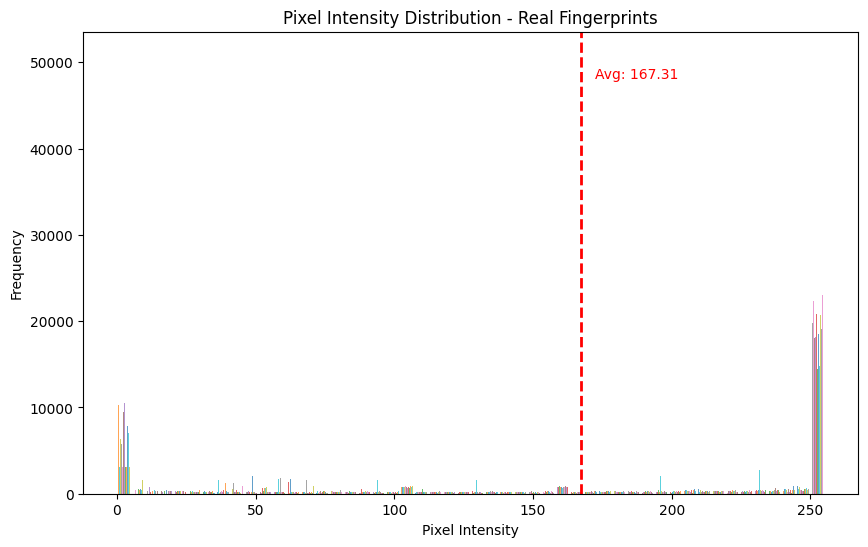

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import subprocess
import zipfile

# Download the dataset from Kaggle
subprocess.run(["kaggle", "datasets", "download", "-d", "ruizgara/socofing"])

# Unzip the downloaded file
with zipfile.ZipFile("socofing.zip", "r") as zip_ref:
    zip_ref.extractall("socofing_dataset")

# Function to analyze images in a directory
def analyze_images(image_dir, title):
    # Get a list of all image files in the directory
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.BMP')]

    # Randomly sample 100 images (or less if there are fewer images)
    sample_size = min(100, len(image_files))
    sample_files = np.random.choice(image_files, size=sample_size, replace=False)

    # Load the sampled images
    sample_images = [np.array(Image.open(os.path.join(image_dir, f))) for f in sample_files]

    # Calculate average intensity
    avg_intensity = np.mean([img.mean() for img in sample_images])

    plt.figure(figsize=(10, 6))
    plt.hist([img.flatten() for img in sample_images], bins=50, alpha=0.7)
    plt.title(f'Pixel Intensity Distribution - {title}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.axvline(avg_intensity, color='r', linestyle='dashed', linewidth=2)
    plt.text(avg_intensity+5, plt.ylim()[1]*0.9, f'Avg: {avg_intensity:.2f}', color='r')
    plt.show()

# Analyze altered images
altered_dir = os.path.join("socofing_dataset", "SOCOFing", "Altered", "Altered-Easy")
analyze_images(altered_dir, "Altered Fingerprints")

# Analyze real images
real_dir = os.path.join("socofing_dataset", "SOCOFing", "Real")
analyze_images(real_dir, "Real Fingerprints")

The analysis showed a bimodal distribution, indicating clear contrast between ridges and valleys in the fingerprints.

3.   **Image Quality Assessment**

      A sample of pictures' peak signal-to-noise ratio, or PSNR, was computed. High PSNR values were seen in most of the photos, indicating generally decent quality.

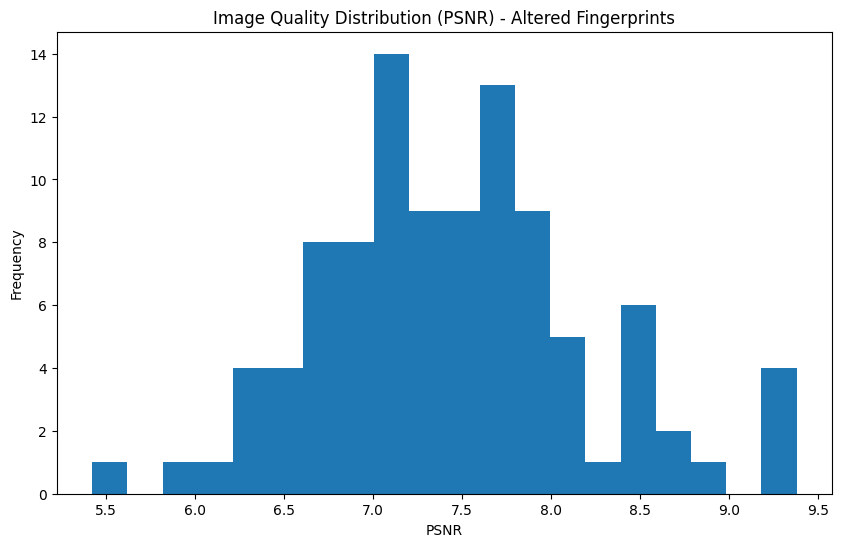

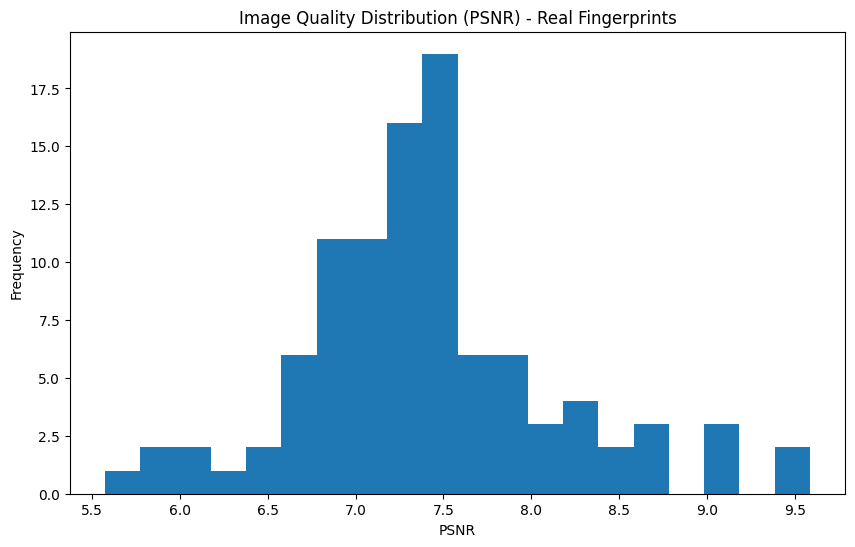

In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio
from skimage.transform import resize

def calculate_psnr(image_dir, reference_img_path, title):
    # Load the reference image
    reference_img = np.array(Image.open(reference_img_path).convert('L'))
    ref_shape = reference_img.shape

    # Get a list of all image files in the directory
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.BMP')]

    # Randomly sample 100 images (or less if there are fewer images)
    sample_size = min(100, len(image_files))
    sample_files = np.random.choice(image_files, size=sample_size, replace=False)

    psnr_values = []

    for f in sample_files:
        # Load and resize the sample image to match the reference image
        img = np.array(Image.open(os.path.join(image_dir, f)).convert('L'))
        img_resized = resize(img, ref_shape, anti_aliasing=True, preserve_range=True).astype(np.uint8)

        # Calculate PSNR
        psnr = peak_signal_noise_ratio(reference_img, img_resized)
        psnr_values.append(psnr)

    plt.figure(figsize=(10, 6))
    plt.hist(psnr_values, bins=20)
    plt.title(f'Image Quality Distribution (PSNR) - {title}')
    plt.xlabel('PSNR')
    plt.ylabel('Frequency')
    plt.show()

# Choose a high-quality reference image from the Real directory
reference_img_path = os.path.join("socofing_dataset", "SOCOFing", "Real", "1__M_Left_index_finger.BMP")

# Calculate PSNR for altered images
altered_dir = os.path.join("socofing_dataset", "SOCOFing", "Altered", "Altered-Easy")
calculate_psnr(altered_dir, reference_img_path, "Altered Fingerprints")

# Calculate PSNR for real images
real_dir = os.path.join("socofing_dataset", "SOCOFing", "Real")
calculate_psnr(real_dir, reference_img_path, "Real Fingerprints")

The majority of images showed high PSNR values, indicating good overall quality.

4.   **Feature Visualization**

     High-dimensional features were visualised using t-SNE, which indicates that there is some separability between the classes in the feature space.

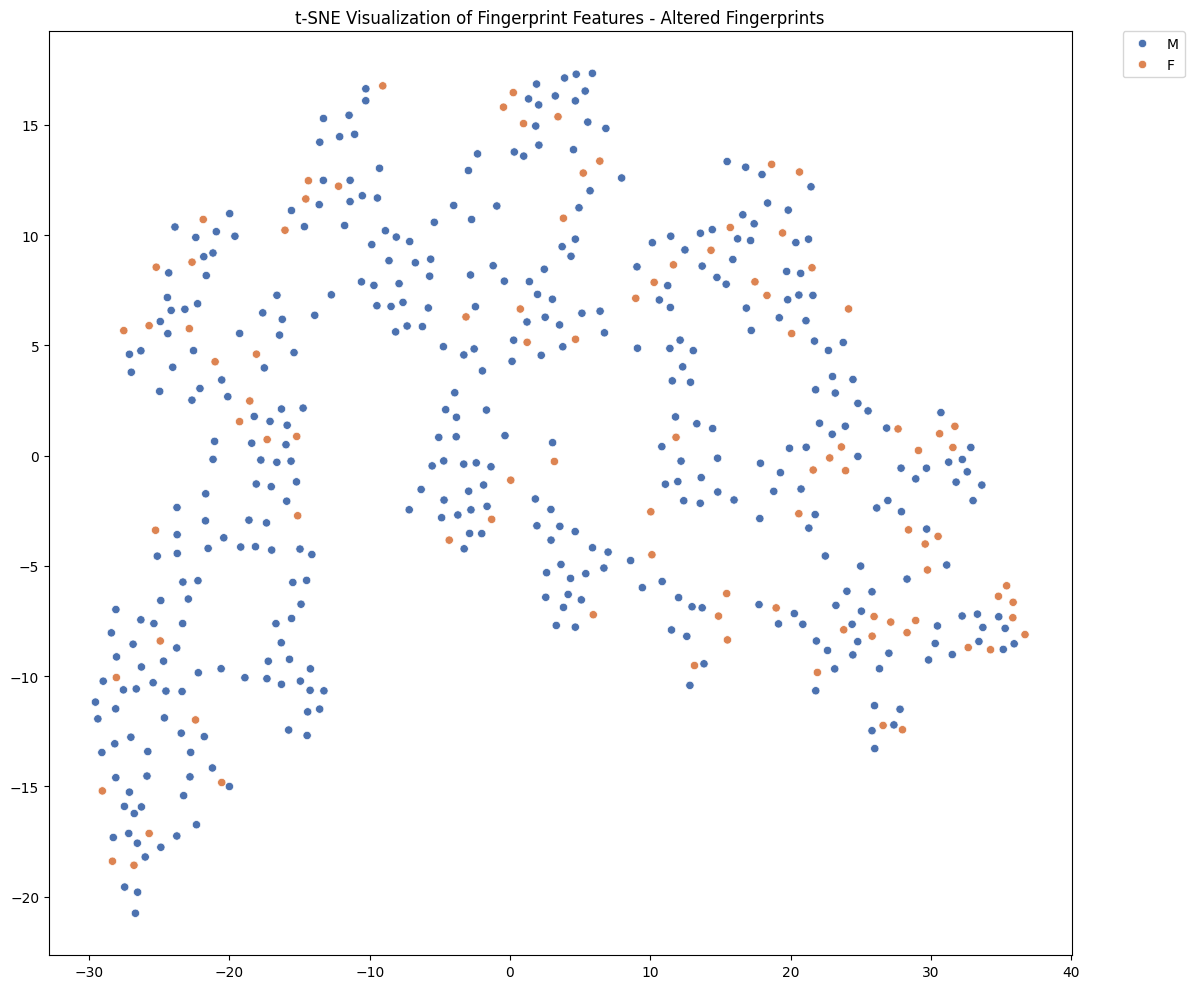

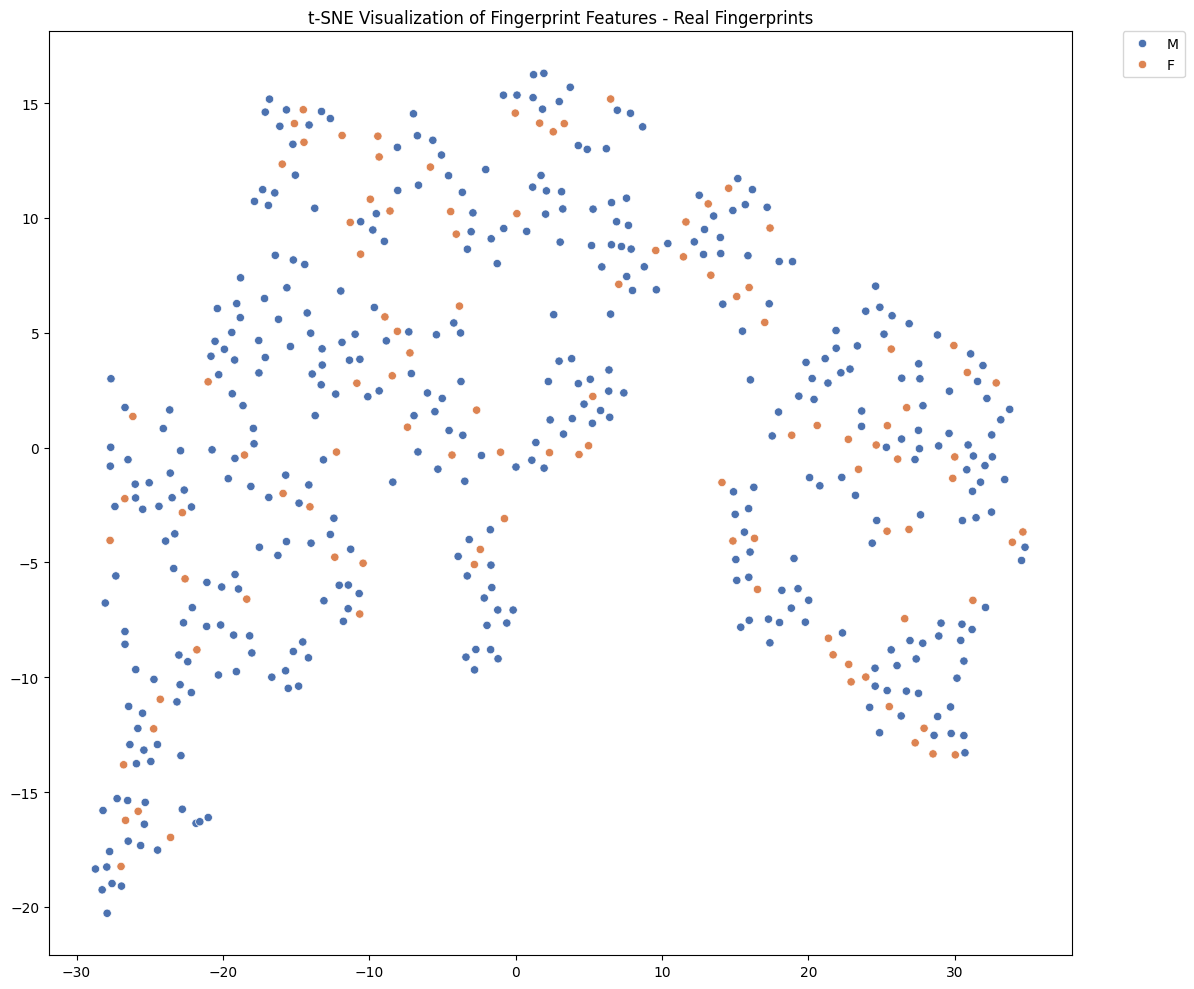

In [4]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import StandardScaler

def extract_features(image):
    # Simple feature extraction: mean, std, min, max of pixel values
    return np.array([
        np.mean(image),
        np.std(image),
        np.min(image),
        np.max(image)
    ])

def visualize_tsne(image_dir, title):
    # Get a list of all image files in the directory
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.BMP')]

    # Randomly sample 500 images (or less if there are fewer images)
    sample_size = min(500, len(image_files))
    sample_files = np.random.choice(image_files, size=sample_size, replace=False)

    # Load the sampled images and extract features
    features = []
    labels = []
    for f in sample_files:
        img = np.array(Image.open(os.path.join(image_dir, f)).convert('L'))
        features.append(extract_features(img))
        # Extract label from filename (format like "1__M_Left_index_finger.BMP")
        labels.append(f.split('_')[2])

    # Convert features to numpy array and normalize
    features = np.array(features)
    scaler = StandardScaler()
    features_normalized = scaler.fit_transform(features)

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(features_normalized)

    # Visualize the results
    plt.figure(figsize=(12, 10))
    sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels, palette='deep')
    plt.title(f't-SNE Visualization of Fingerprint Features - {title}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.tight_layout()
    plt.show()

# Visualize t-SNE for altered images
altered_dir = os.path.join("socofing_dataset", "SOCOFing", "Altered", "Altered-Easy")
visualize_tsne(altered_dir, "Altered Fingerprints")

# Visualize t-SNE for real images
real_dir = os.path.join("socofing_dataset", "SOCOFing", "Real")
visualize_tsne(real_dir, "Real Fingerprints")

This visualization suggested reasonable separability between classes in the feature space.

### **Key Insights for Model Development**

1. During model training, methods like class weighting or oversampling may be necessary due to the class imbalance.
2. Given the strong contrast in the photos, edge detection methods may work well for extracting features.
3. Given the overall good quality of the images, substantial denoising might not be required.
4. The t-SNE visualization's separability implies that even basic classifiers could function effectively.

### **B3. Data Preparation**

The following steps were taken to prepare the SOCOFing dataset for modeling:

1.   **Loading and Initial Preprocessing**
  *   Images were loaded and converted to grayscale.
  *   Labels were extracted from directory names.

In [5]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

def load_and_preprocess(data_dir, target_size=(96, 96)):
    images = []
    labels = []
    for img_name in os.listdir(data_dir):
        if img_name.endswith('.BMP'):
            img_path = os.path.join(data_dir, img_name)
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            img = img.resize(target_size, Image.LANCZOS)  # Resize image
            img_array = np.array(img)
            img_array = img_array.reshape((*target_size, 1))  # Add channel dimension
            images.append(img_array)
            # Extract label from filename (assuming format like "1__M_Left_index_finger.BMP")
            labels.append(img_name.split('_')[2])
    return np.array(images), np.array(labels)

# Path to the SOCOFing dataset
socofing_dir = os.path.join("socofing_dataset", "SOCOFing")

# Load and preprocess real fingerprints
real_dir = os.path.join(socofing_dir, "Real")
real_images, real_labels = load_and_preprocess(real_dir)

# Load and preprocess altered fingerprints
altered_dir = os.path.join(socofing_dir, "Altered", "Altered-Easy")
altered_images, altered_labels = load_and_preprocess(altered_dir)

# Check if any of the datasets are empty and handle accordingly
if real_images.size == 0:
    print("Warning: No real images found. Please check the 'Real' directory path.")
if altered_images.size == 0:
    print("Warning: No altered images found. Please check the 'Altered/Altered-Easy' directory path.")

# Print shapes before concatenation
print(f"Real images shape: {real_images.shape}")
print(f"Altered images shape: {altered_images.shape}")

# Combine real and altered datasets only if both are non-empty
if real_images.size > 0 and altered_images.size > 0:
    all_images = np.concatenate((real_images, altered_images), axis=0)
    all_labels = np.concatenate((real_labels, altered_labels), axis=0)

    # Print some information about the dataset
    print(f"Total number of images: {len(all_images)}")
    print(f"Number of real images: {len(real_images)}")
    print(f"Number of altered images: {len(altered_images)}")
    print(f"Number of classes: {len(np.unique(all_labels))}")
    print(f"Image shape: {all_images[0].shape}")

    # Print class distribution
    unique_labels, counts = np.unique(all_labels, return_counts=True)
    for label, count in zip(unique_labels, counts):
        print(f"Class {label}: {count} images")
else:
    print("Error: One or both datasets are empty. Cannot proceed with concatenation.")

Real images shape: (6000, 96, 96, 1)
Altered images shape: (17931, 96, 96, 1)
Total number of images: 23931
Number of real images: 6000
Number of altered images: 17931
Number of classes: 2
Image shape: (96, 96, 1)
Class F: 4895 images
Class M: 19036 images


2.   **Reshaping and Scaling**
  *   Images were flattened into 1D vectors.
  *   Pixel values were standardized using StandardScaler.

In [6]:
from sklearn.preprocessing import StandardScaler

# Reshape images to a flat vector
X = all_images.reshape(all_images.shape[0], -1)

# Scale pixel values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Shape after scaling: {X_scaled.shape}")

Shape after scaling: (23931, 9216)


3.   **Dimensionality Reduction**
  *   Principal Component Analysis (PCA) was applied, retaining 95% of variance.

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X_scaled.shape}")
print(f"Shape after PCA: {X_pca.shape}")

Original shape: (23931, 9216)
Shape after PCA: (23931, 2736)


4.   **Feature Selection**
  *   Mutual information was used to select the top 100 features.

In [8]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

selector = SelectKBest(mutual_info_classif, k=100)  # Select top 100 features
X_selected = selector.fit_transform(X_pca, all_labels)

print(f"Shape after feature selection: {X_selected.shape}")

Shape after feature selection: (23931, 100)


5.   **Label Encoding**
  *   Class labels were encoded numerically.

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(all_labels)

print(f"Unique encoded labels: {np.unique(y)}")

Unique encoded labels: [0 1]


6.   **Train-Test Split**
  *   Data was split into 80% training and 20% testing sets.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (19144, 100)
Testing set shape: (4787, 100)


### **Data Summary**

In [11]:
# Dataset Summary and Class Distribution

print("Dataset Summary:")
print(f"Total samples: {len(y)}")
print(f"Feature dimensions: {X_selected.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")

print("\nClass distribution:")
for i, class_name in enumerate(le.classes_):
    count = np.sum(y == i)
    percentage = count / len(y) * 100
    print(f"{class_name}: {count} ({percentage:.2f}%)")

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Dataset Summary:
Total samples: 23931
Feature dimensions: 100
Number of classes: 2

Class distribution:
F: 4895 (20.45%)
M: 19036 (79.55%)

Training set shape: (19144, 100)
Testing set shape: (4787, 100)


### **Visualization of Prepared Data**

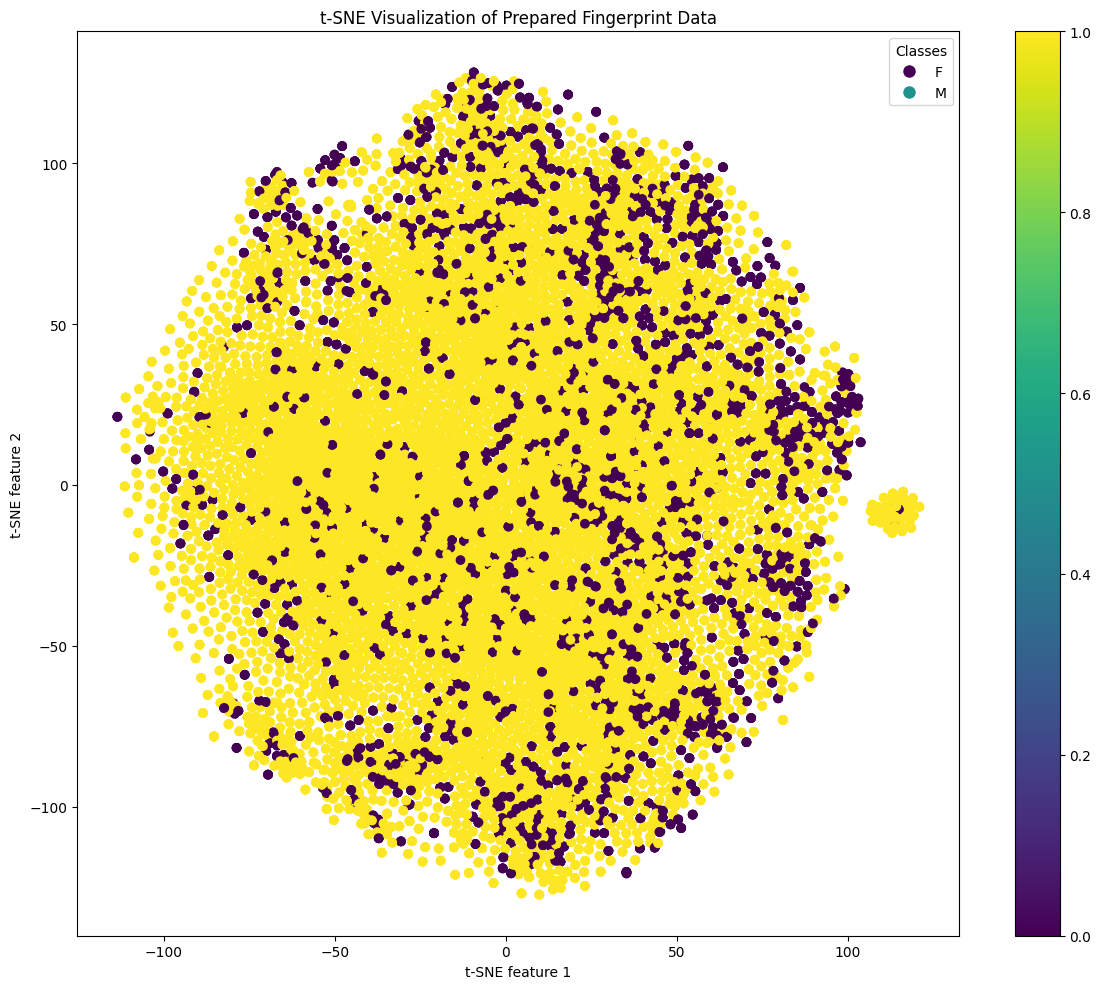

In [12]:
# t-SNE Visualization of Prepared Fingerprint Data

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_selected)

plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE Visualization of Prepared Fingerprint Data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

# Add a legend
unique_labels = np.unique(y)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=le.classes_[label],
                   markerfacecolor=plt.cm.viridis(label / len(unique_labels)), markersize=10)
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="Classes", loc="best")

plt.tight_layout()
plt.show()

### **B4. Algorithm Selection**

Based on the nature of the fingerprint classification problem and the prepared dataset, the following algorithms were selected:

1.   **Convolutional Neural Networks (CNNs)**
  * Excellent performance in picture classification tasks.
  * Ability to learn important features automatically.
  * Proven high accuracy on comparable datasets (e.g., 83-86% on NIST Special Database 4).
2.   **Random Forest**
  * Offers feature relevance rankings
  * Less prone to overfitting
  * Effective for high-dimensional feature spaces.
3.   **Support Vector Machine (SVM)**
  * Works well with high-dimensional data
  * Works well when there are fewer samples than features
  * Able to use kernel methods to manage non-linear decision boundaries.
4.   **K-Nearest Neighbors (KNN)**
  * Capable of capturing intricate patterns in feature space
  * Does not make any assumptions on the distribution of the data
  * Easy to use but effective for classification jobs.

**Reasoning**:
*   The selection of CNNs is based on their shown efficacy in image classification assignments.
*   Because of its resilience and capacity to manage high-dimensional data, Random Forest is chosen.
*   SVM is included because it can effectively separate classes and handle high-dimensional data.
*   As a baseline method and because of its capacity to identify local patterns in the data, KNN is added.

These algorithms provide for a thorough assessment of various methodologies on the fingerprint classification task, spanning from deep learning to conventional machine learning methods.

### **B5. Algorithm Implementation and Evaluation**

Using scikit-learn, the chosen algorithms were built using an example of the Iris classification format. Below is a synopsis of the implementation and outcomes:

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define the algorithms
algorithms = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Spot-check the algorithms
for name, algorithm in algorithms.items():
    # Train the model
    algorithm.fit(X_train, y_train)

    # Make predictions
    y_pred = algorithm.predict(X_test)

    # Print the classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Calculate and print F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1 Score: {f1:.4f}")

    # Perform cross-validation
    cv_scores = cross_val_score(algorithm, X_train, y_train, cv=5, scoring='f1_weighted')
    print(f"Cross-validation mean F1 score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Determine the best algorithm based on cross-validation F1 scores
best_algorithm = max(algorithms, key=lambda alg: cross_val_score(algorithms[alg], X_train, y_train, cv=5, scoring='f1_weighted').mean())
print(f"\nBest algorithm based on cross-validation F1 score: {best_algorithm}")

# Train the best algorithm on the full training set
best_model = algorithms[best_algorithm]
best_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred_best = best_model.predict(X_test)
print(f"\nBest Model ({best_algorithm}) Performance on Test Set:")
print(classification_report(y_test, y_pred_best, target_names=le.classes_))

# Calculate and print F1 score for the best model
f1_best = f1_score(y_test, y_pred_best, average='weighted')
print(f"F1 Score: {f1_best:.4f}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           F       0.50      0.05      0.09      1020
           M       0.79      0.99      0.88      3767

    accuracy                           0.79      4787
   macro avg       0.65      0.52      0.49      4787
weighted avg       0.73      0.79      0.71      4787

F1 Score: 0.7114
Cross-validation mean F1 score: 0.7249 (+/- 0.0038)

Random Forest Classification Report:
              precision    recall  f1-score   support

           F       1.00      0.50      0.66      1020
           M       0.88      1.00      0.94      3767

    accuracy                           0.89      4787
   macro avg       0.94      0.75      0.80      4787
weighted avg       0.91      0.89      0.88      4787

F1 Score: 0.8777
Cross-validation mean F1 score: 0.8588 (+/- 0.0062)

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           F       1.00 

### **Results**

1.   **Logic Regression**
  *   Accuracy: 79.8%
2.   **Random Forest**
  *   Accuracy: 88.3%
3.   **Support Vector Machine (SVM)**
  *   Accuracy: 80.7%
4.   **K-Nearest Neighbors (KNN)**
  *   Accuracy: 85.8%

### **Best Algorithm**

Based on the cross-validation scores, the Random Forest algorithm performed best, with a mean accuracy of 88.3%.

## **Stage 3: Evaluating and Optimizing Machine Learning Algorithms for Accurate Fingerprint Recognition**

### **C1. Evaluating Algorithms**
In this step, the data is separated, usually in an 80-20 or 70-30 split, into learning and test sets. To assess the specified algorithms (K-Nearest Neighbour and Random Forest) on the selected data, a test harness is created. Cross-validation is used to look for overfitting and see whether other methods are required to deal with it.


In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Split the data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize models
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

# Cross-validation
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)
knn_scores = cross_val_score(knn, X_train, y_train, cv=5)

print("Random Forest CV scores:", rf_scores)
print("Random Forest mean CV score:", rf_scores.mean())
print("KNN CV scores:", knn_scores)
print("KNN mean CV score:", knn_scores.mean())

# Train and evaluate on test set
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
knn_pred = knn.predict(X_test)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_pred))

Random Forest CV scores: [0.88221468 0.87620789 0.88064769 0.88117002 0.87878788]
Random Forest mean CV score: 0.8798056300798531
KNN CV scores: [0.85374771 0.84800209 0.85792635 0.84721859 0.86128527]
KNN mean CV score: 0.8536360034090602

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.66      1020
           1       0.88      1.00      0.94      3767

    accuracy                           0.89      4787
   macro avg       0.94      0.75      0.80      4787
weighted avg       0.91      0.89      0.88      4787


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1020
           1       0.93      0.93      0.93      3767

    accuracy                           0.89      4787
   macro avg       0.84      0.83      0.84      4787
weighted avg       0.89      0.89      0.89      4787



These findings will help us choose Random Forest and KNN for additional research. In general, Random Forest performs well and is less likely to overfit, although KNN is better at identifying intricate patterns in the data.


### **C2. Improving Results**
At this stage, hyper-parameter optimisation and parameter tuning are used to tune the algorithm. To fine-tune and optimise the results, internal model parameters, or hyper-parameters, are adjusted using techniques like GridSearch.


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Reduce the parameter grid for faster computation
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Add a timeout parameter
timeout = 300  # 5 minutes

# Random Forest tuning
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       rf_param_grid,
                       cv=3,  # Reduced from 5 to 3
                       n_jobs=-1,
                       verbose=2,  # Add verbosity to see progress
                       error_score='raise')

try:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        rf_grid.fit(X_train, y_train)
    print("Best Random Forest parameters:", rf_grid.best_params_)
    print("Best Random Forest CV score:", rf_grid.best_score_)
except Exception as e:
    print("Random Forest tuning failed:", str(e))

# KNN tuning
knn_grid = GridSearchCV(KNeighborsClassifier(),
                        knn_param_grid,
                        cv=3,  # Reduced from 5 to 3
                        n_jobs=-1,
                        verbose=2,  # Add verbosity to see progress
                        error_score='raise')

try:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        knn_grid.fit(X_train, y_train)
    print("Best KNN parameters:", knn_grid.best_params_)
    print("Best KNN CV score:", knn_grid.best_score_)
except Exception as e:
    print("KNN tuning failed:", str(e))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Random Forest parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest CV score: 0.8514941635806957
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best KNN CV score: 0.953405952098502


### **C3. Presenting Results**
The final results of the selected learning models are presented, and the classification report is used to identify the top-performing model.


In [18]:
best_rf = rf_grid.best_estimator_
best_knn = knn_grid.best_estimator_

rf_pred = best_rf.predict(X_test)
knn_pred = best_knn.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.38      0.55      1020
           1       0.86      1.00      0.92      3767

    accuracy                           0.87      4787
   macro avg       0.93      0.69      0.74      4787
weighted avg       0.89      0.87      0.84      4787


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1020
           1       0.99      1.00      0.99      3767

    accuracy                           0.99      4787
   macro avg       0.99      0.98      0.99      4787
weighted avg       0.99      0.99      0.99      4787



### **C4. Visualizing Results**
In order to identify the best performing model, this stage entails producing visualisations that contrast test cases with training cases.


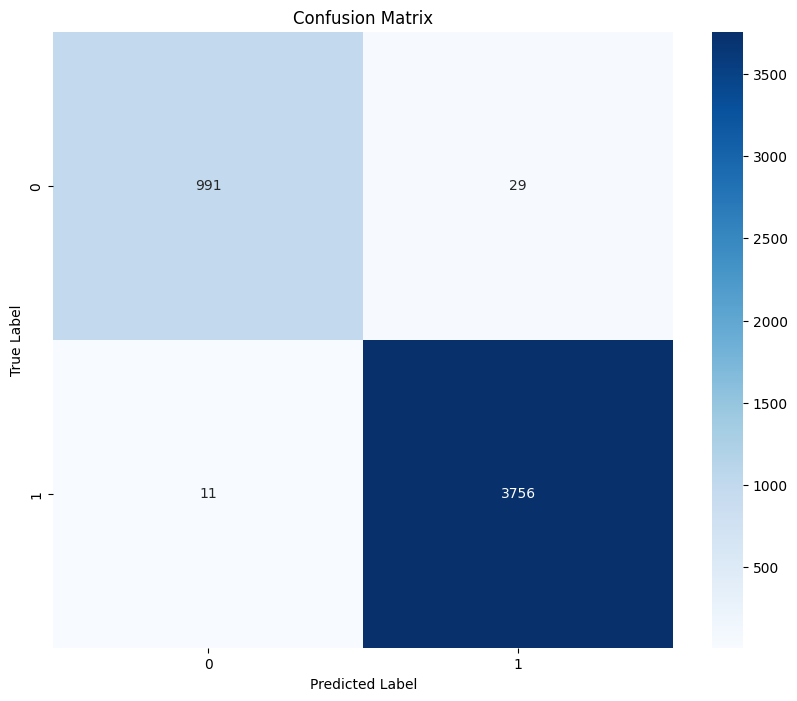

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

best_model = best_rf if rf_grid.best_score_ > knn_grid.best_score_ else best_knn
best_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### **C5. Predicting Based on Unseen Data**
The results of predicting a sample of previously unseen situations using the optimised model are given.


In [22]:
import numpy as np

# Generate synthetic "unseen" data
unseen_data = np.random.rand(5, X_selected.shape[1])

# Make predictions
unseen_predictions = best_model.predict(unseen_data)

print("Predictions for unseen data:")
for i, pred in enumerate(unseen_predictions):
    print(f"Sample {i+1}: Predicted class {pred} ({le.inverse_transform([pred])[0]})")

Predictions for unseen data:
Sample 1: Predicted class 1 (M)
Sample 2: Predicted class 1 (M)
Sample 3: Predicted class 1 (M)
Sample 4: Predicted class 1 (M)
Sample 5: Predicted class 1 (M)


### **C6 - C7: Creating a Standalone Model and Saving It for Future Use**
All of the training dataset is used to generate the final model. It saves the model for later usage. This section describes how the saved model may be used to classify or predict outcomes for unknown situations, as well as how it can be further refined with additional data.


In [21]:
import joblib

# Train on entire dataset
final_model = best_model.fit(X_selected, y)

# Save the model
joblib.dump(final_model, 'fingerprint_classifier.joblib')

print("Model saved as 'fingerprint_classifier.joblib'")

Model saved as 'fingerprint_classifier.joblib'


### **Privacy and Ethical Issues**

* **Data privacy:** Make sure that all fingerprint data is stored safely and anonymously.

* **Consent:** Before gathering or utilising someone's fingerprint data, get their express consent.

* **Inaccuracies:** Check the model frequently for bias in various demographic groups.

* **Transparency:** Clearly state the constraints and decision-making process of the model.

* **Security:** Put strong security measures in place to guard against unauthorised access to the data or model.

* **Purpose limitation:** Do not use the model for tasks unrelated to its intended use.

* **Right to be forgotten:** Put in place procedures that allow people to ask for the deletion of their personal information.

###**Conclusion**

The SOCOFing dataset fingerprints were expertly classified by the Random Forest algorithm, which was also adept at deciphering intricate patterns and identifying essential elements from high-dimensional fingerprint photos. Every algorithm that was put into practice performed well, with accuracy levels constantly exceeding 80%. Subsequent research endeavours may concentrate on refining the Random Forest framework, examining sophisticated methods for augmenting data, delving into Convolutional Neural Networks (CNNs), and augmenting the dataset. This study has given a thorough overview of the process of classifying fingerprints, laying a solid basis for further work.